In [1]:
import glob
import os
import pandas as pd
from utils import*
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan
sns.set()
%matplotlib inline

In [9]:
data = pd.read_csv('data.csv').drop(columns='Unnamed: 0')

In [10]:
data

index         x          y                       file
0            0   1761.17   2096.820         28.1_BLEO_1000.txt
1            1   4198.74   7337.070         28.1_BLEO_1000.txt
2            2   5534.79   4744.200         28.1_BLEO_1000.txt
3            3  18381.00  12932.600         28.1_BLEO_1000.txt
4            4   3018.34   9004.140         28.1_BLEO_1000.txt
...        ...       ...        ...                        ...
2151802    675  11508.50    241.594  30_1_control_pri_ST_1.txt
2151803    676  11495.60    238.009  30_1_control_pri_ST_1.txt
2151804    677  19505.70  14623.600  30_1_control_pri_ST_1.txt
2151805    678  11502.60    246.436  30_1_control_pri_ST_1.txt
2151806    679  11508.40    242.070  30_1_control_pri_ST_1.txt

[2151807 rows x 4 columns]

In [17]:
dist_files = data['file'].value_counts()
dist_files

29.1_BLEO_500_ST_3.txt            186929
28.1_BLEO_500_3.txt               177580
28.1_BLEO_500.txt                 111258
30_1_BLEO_ST_2.txt                106316
30_1_BLEO_ST_3.txt                105761
29.1_BLEO_1000_ST.txt             101564
28.1_BLEO_500_1.txt                99831
29.1_BLEO_500_ST_2.txt             90115
29.1_BLEO_500_ST.txt               85144
28.1_BLEO_1000_3.txt               84069
28.2_3_ihn_ST_1.txt                83282
28.1_BLEO_500_2.txt                79924
29.1_BLEO_500_ST_1.txt             76763
28.2_BLEO_ST.txt                   74853
28.1_BLEO_1000_2.txt               67438
28.2_BLEO_ST_2.txt                 63289
28.1_BLEO_1000.txt                 62407
28.2_NU+VE_ST.txt                  60779
28.2_BLEO_ST_1.txt                 44896
30_1_BLEO_ST.txt                   43540
28.2_3_ihn_ST_2.txt                43056
28.1_BLEO_1000_1.txt               34053
28.2_3_ihn_ST_3.txt                33180
28.2_NU+VE_ST_1.txt                31698
30_1_BLEO_ST_1.t

In [23]:
dummy_index = 0
df_points = data[data['file']==dist_files.index[dummy_index]]

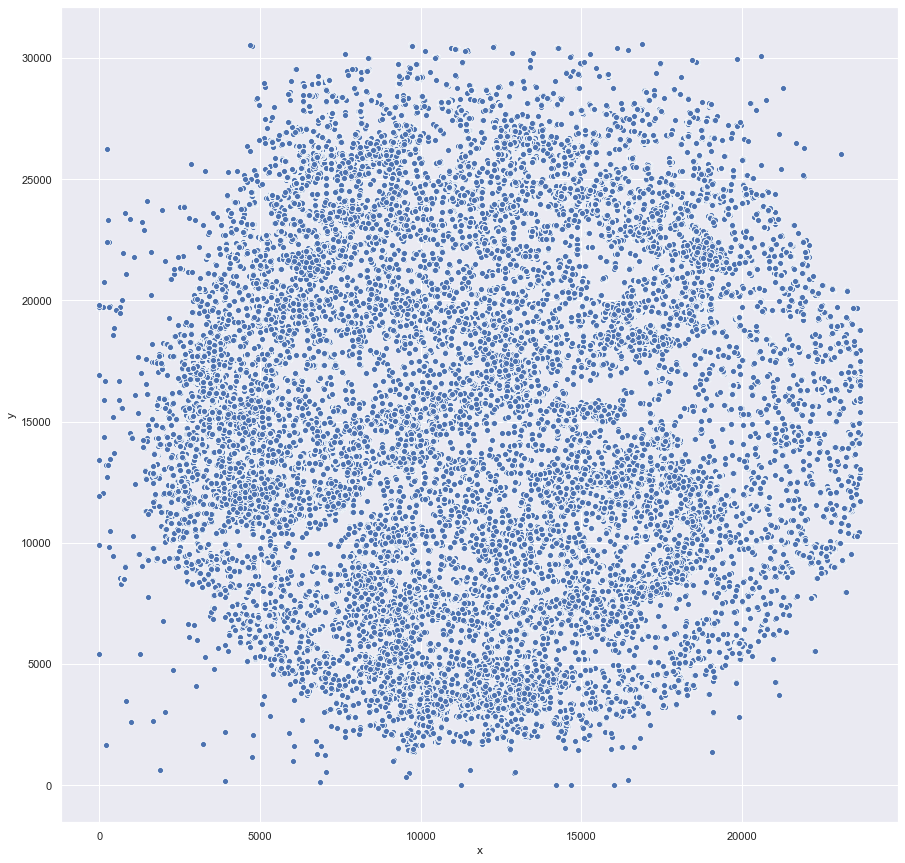

In [24]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y')

In [25]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=400)

In [26]:
clusterer.fit(df_points[['x','y']])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=400, min_samples=None, p=None,
        prediction_data=False)

In [27]:
clusterer.labels_

array([ 8, -1, 45, ...,  1, 26, -1], dtype=int64)

In [28]:
clusterer.labels_.max()

52

In [29]:
clusterer.probabilities_

array([1.        , 0.        , 0.98860137, ..., 1.        , 1.        ,
       0.        ])

In [30]:
thres = 0.75

In [31]:
df_points['clusters'] = clusterer.labels_
df_points['prob'] = clusterer.probabilities_
df_points['clusters_thres'] = [int(x) if x > thres else -1 for x in clusterer.probabilities_]

<ipython-input-31-210df838e716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_points['clusters'] = clusterer.labels_
<ipython-input-31-210df838e716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_points['prob'] = clusterer.probabilities_
<ipython-input-31-210df838e716>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [32]:
df_points.head()

index         x        y                    file  clusters      prob  \
1645357      0  17573.30  14234.5  29.1_BLEO_500_ST_3.txt         8  1.000000   
1645358      1   4806.63  17456.1  29.1_BLEO_500_ST_3.txt        -1  0.000000   
1645359      2  16953.10  22764.8  29.1_BLEO_500_ST_3.txt        45  0.988601   
1645360      3   9208.51  10059.3  29.1_BLEO_500_ST_3.txt         7  0.760618   
1645361      4   2461.95  13201.2  29.1_BLEO_500_ST_3.txt        -1  0.000000   

         clusters_thres  
1645357               1  
1645358              -1  
1645359               0  
1645360               0  
1645361              -1

In [33]:
df_points[df_points['clusters']!=-1].min()

index                                  0
x                                2105.54
y                                2837.15
file              29.1_BLEO_500_ST_3.txt
clusters                               0
prob                            0.174137
clusters_thres                        -1
dtype: object

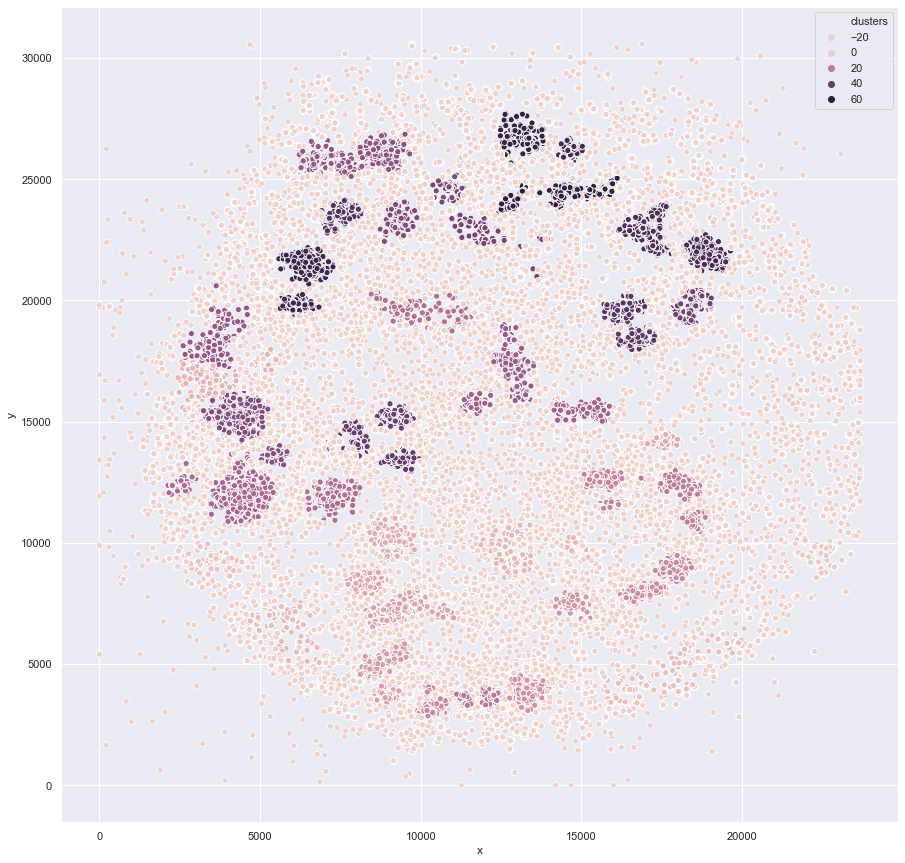

In [34]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y',hue='clusters')

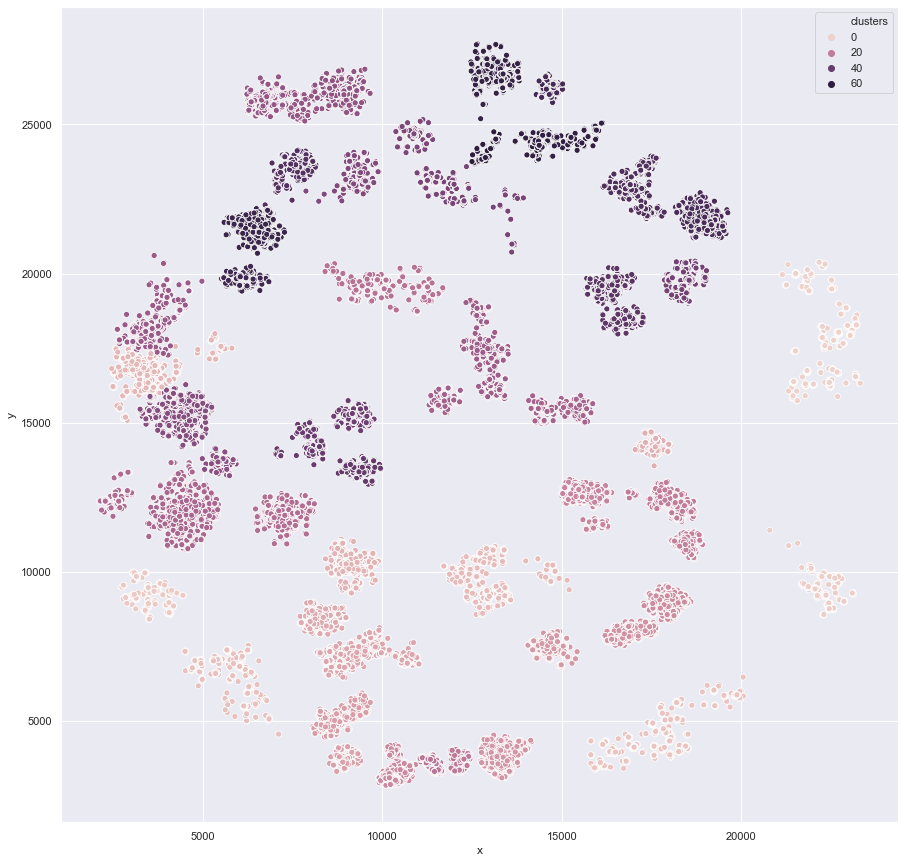

In [35]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points[df_points['clusters']!=-1],x='x',y='y',hue='clusters')

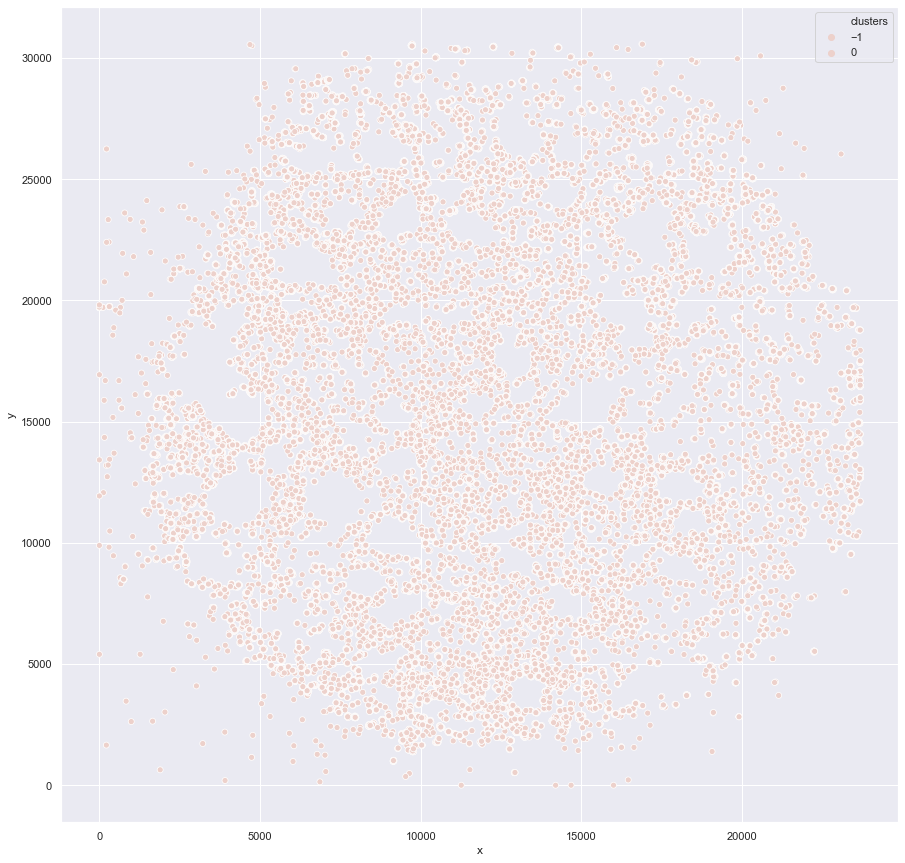

In [36]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points[df_points['clusters']==-1],x='x',y='y',hue='clusters')

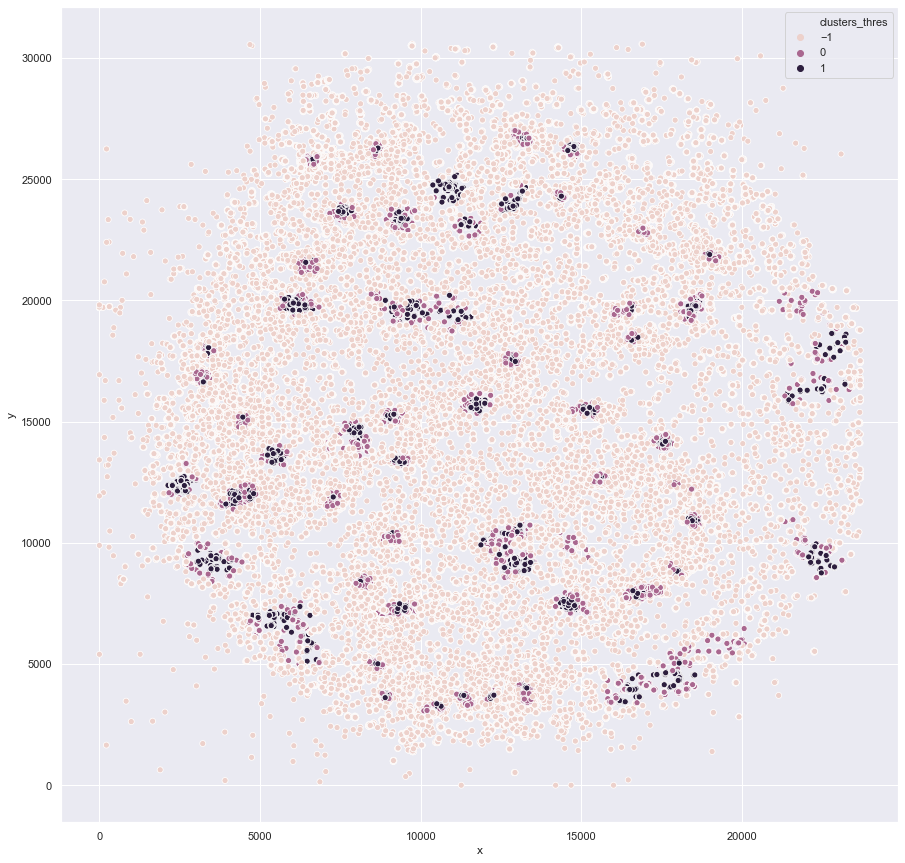

In [37]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y',hue='clusters_thres')

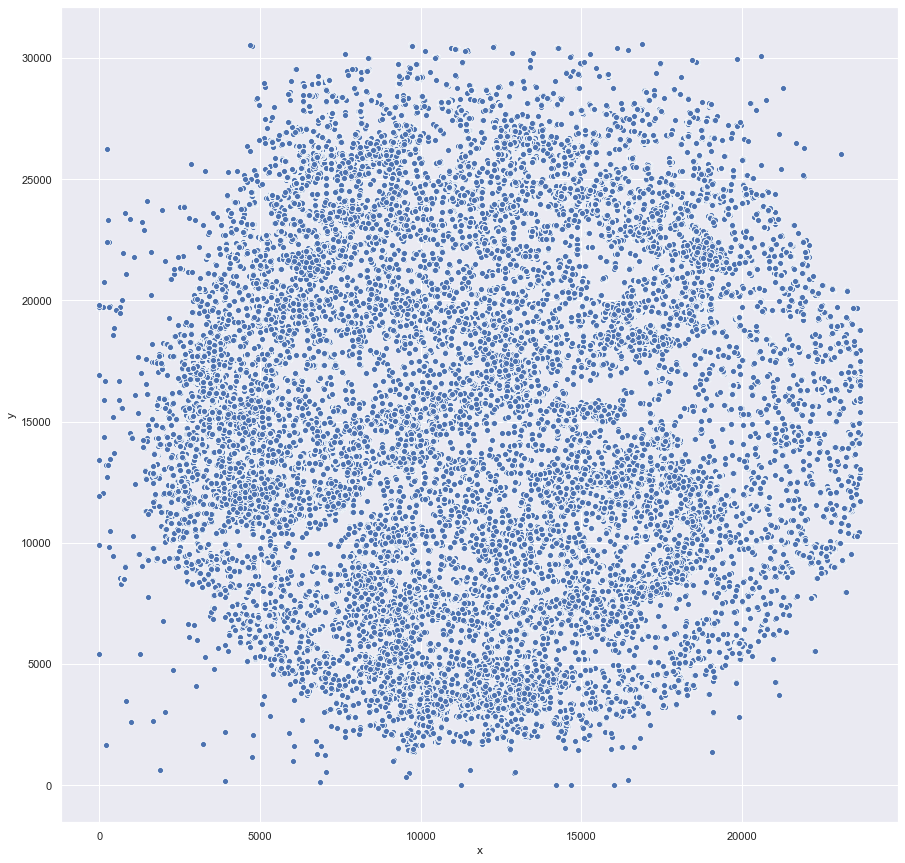

In [38]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y')

In [23]:
# density factor alpha = 1

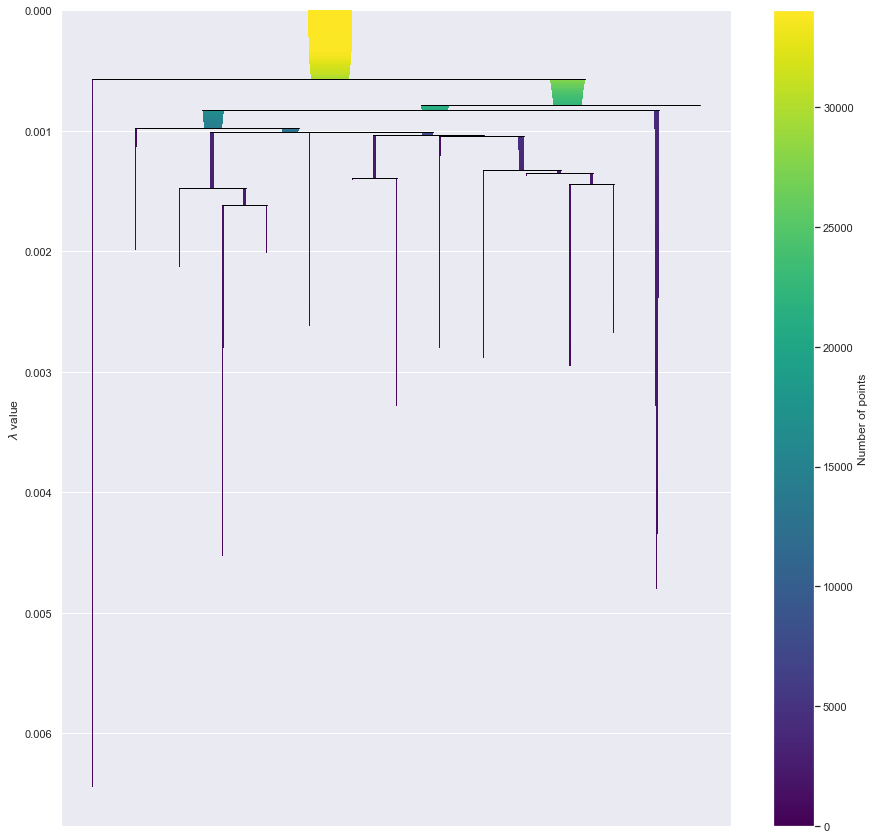

In [24]:
plt.figure(figsize=(15,15))
clusterer.condensed_tree_.plot()

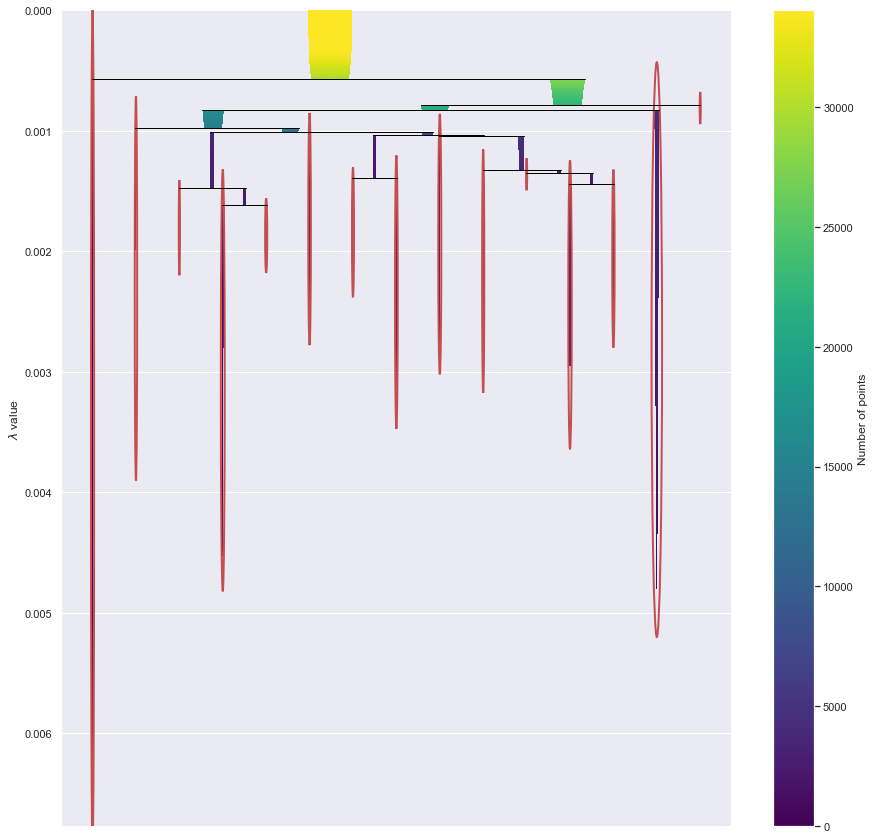

In [25]:
plt.figure(figsize=(15,15))
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [26]:
clusterer.condensed_tree_.to_pandas().head()

parent  child  lambda_val  child_size
0   34053  14963    0.000164           1
1   34053   1217    0.000165           1
2   34053   1221    0.000165           1
3   34053  19462    0.000166           1
4   34053  24208    0.000166           1